# Pymaceuticals Inc.
---

### Analysis

Background:
We had total 249 mice originally in this animal study and eliminated 1 mouse which had duplicate rows with same timepoints. Therefore, the final results were all based on the rest 248 mice.

Analysis:
Capomulin has relatively low (#2 out of 10 drug regimens) summary statististics, including the mean, median, variance, standard deviation, and SEM of the tumor volume; only slightly higher than Ramicane while far more lower than the other 8. Additionaly, the final tumor volume (average) is also the #2 smallest among the other drug regimens.

We also randomly picked 1 mouse (Mouse ID: l509) treated with Capomulin to analyze the trends of the tumor volume changes throughout the 45 days. It started with 45 mm3 and turned out to be around 41.5 mm3 at the end of the 45th day of the study. However, the volume did fluctuate quite a bit within the period. 

We also found out that there's a strong positive correlation (coefficnet = 0.84) between the mouse's weight and the average tumor volume, indicating that: the greater the weight of the mouse, the bigger the average tumor volume for those mice who received Capomulin as drug regimen. 

Disclaimer:

Data Validity: 
No duplicates, no missing values.

Analysis Effectiveness:
Capomulin had the greatest number of observed mouse timepoints (200+) among all those regimens.; 
No outliers for the final tumor volume of Capomulin.;
The tumor volumes for all mice at day 0 were the same (45 mm3).;
Mice sex: male vs. female was quite balanced - 51% vs. 49%.


In [418]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_mouse_study_df = pd.merge(study_results, mouse_metadata, how='left', on='Mouse ID')

# Display the data table for preview
combined_mouse_study_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [419]:
# Checking the number of mice.
mice_count = len(combined_mouse_study_df["Mouse ID"].unique())
mice_count


249

In [420]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_mouse_study_df.groupby(['Timepoint', 'Mouse ID']).size().reset_index(name='counts')
duplicate_mice = duplicate_mice[duplicate_mice['counts'] > 1]
unique_duplicate_mouse_ids = duplicate_mice['Mouse ID'].unique()
print(unique_duplicate_mouse_ids)


['g989']


In [421]:
# Optional: Get all the data for the duplicate mouse ID. 


In [422]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = combined_mouse_study_df[combined_mouse_study_df['Mouse ID'] != 'g989']
cleaned_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [423]:
# Checking the number of mice in the clean DataFrame.
cleaned_mice_count = len(cleaned_df["Mouse ID"].unique())
cleaned_mice_count


248

## Summary Statistics

In [424]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
finalized_df = cleaned_df.set_index("Drug Regimen")

mean = finalized_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
median = finalized_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
variance = finalized_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
std = finalized_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
sem = finalized_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
per_drug_regimen_summary = pd.DataFrame({'Mean Tumor Volume': mean, 'Median Tumor Volume': median, 'Tumor Volume Variance': variance, 'Tumor Volume Std. Dev.': std, 'Tumor Volume Std. Err.': sem})
per_drug_regimen_summary


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [425]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
#finalized_df.aggregate([finalized_df])
finalized_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timepoints')

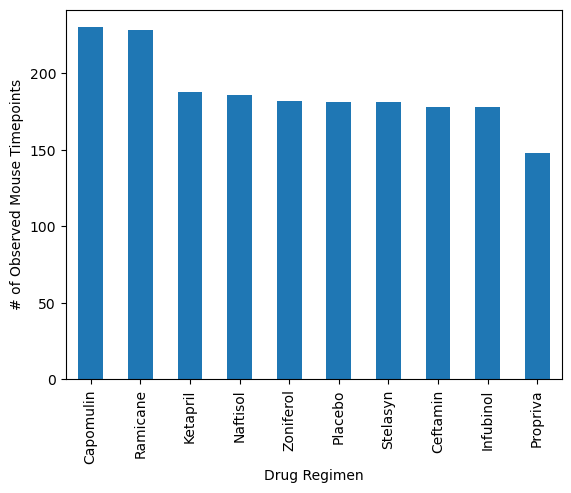

In [426]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
summarized_df = cleaned_df.groupby(['Drug Regimen'])['Timepoint'].count()
summarized_df = summarized_df.sort_values(ascending=False)
bar_plot = summarized_df.plot.bar(x='Drug Regimen', y='Timepoint')
bar_plot.set_ylabel("# of Observed Mouse Timepoints")


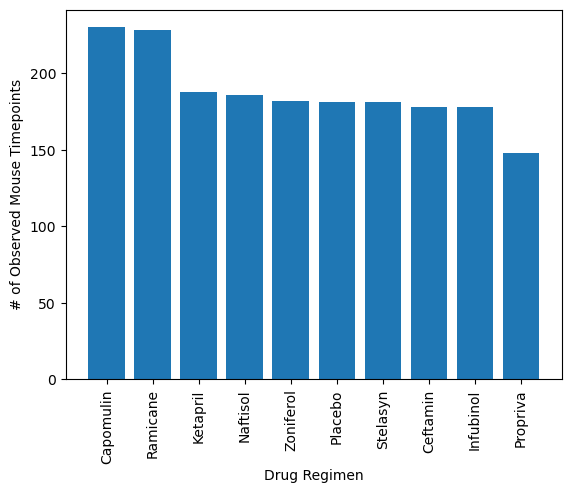

In [427]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
#plt.bar(summarized_df["Drug Regimen"], summarized_df["Timepoint"])
summarized_df = cleaned_df.groupby(['Drug Regimen'])['Timepoint'].count().reset_index()
summarized_df = summarized_df.sort_values(by='Timepoint', ascending=False)

plt.bar(summarized_df["Drug Regimen"], summarized_df["Timepoint"])
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)
plt.show()


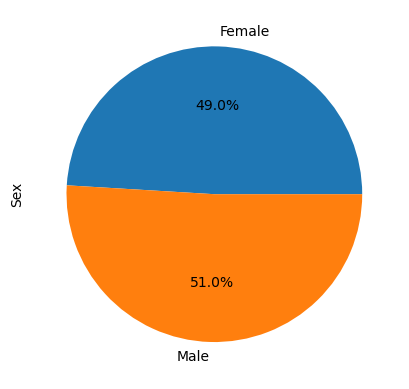

In [428]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
summarized_df_1 = cleaned_df.groupby(['Sex'])["Mouse ID"].count().reset_index()
summarized_df_1.set_index('Sex', inplace=True)

plot_1 = summarized_df_1.plot(kind='pie', y='Mouse ID', autopct='%1.1f%%', legend=False)
plot_1.set_ylabel("Sex")
plt.show()


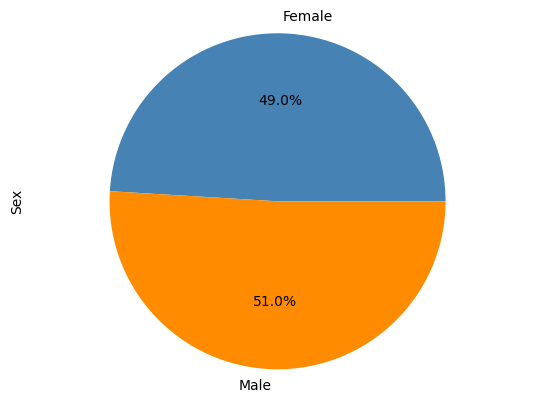

In [429]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = ["Female", "Male"]
sizes = cleaned_df.groupby(['Sex'])["Mouse ID"].count()
colors = ["steelblue", "darkorange"]

plt.pie(sizes, labels=sex, colors=colors, autopct="%1.1f%%", shadow=False, startangle=0)
plt.ylabel('Sex')
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [430]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = cleaned_df.groupby(['Mouse ID'])["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_last = pd.merge(max_timepoint, combined_mouse_study_df, on=['Mouse ID', 'Timepoint'], how='left')


In [431]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Display outliers for each drug
# Locate the rows which contain mice on each drug and get the tumor volumes   
# add subset    
# Determine outliers using upper and lower bounds

treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_vol_data = []

for x in treatment_list:
    treatment_rows = merged_last.loc[merged_last['Drug Regimen'] == x]
    tumor_vol_data.append(treatment_rows['Tumor Volume (mm3)'].tolist())

tumor_vol_df = pd.DataFrame(tumor_vol_data, index=treatment_list).T

lowerq = tumor_vol_df.quantile(0.25)
upperq = tumor_vol_df.quantile(0.75)
iqr = upperq-lowerq

lower_bound = lowerq - (1.5 * iqr)
upper_bound = upperq + (1.5 * iqr)

outliers = {}
for x in treatment_list:
    treatment_data = tumor_vol_df[x]
    outliers[x] = treatment_data[(treatment_data < lower_bound[x]) | (treatment_data > upper_bound[x])].dropna().tolist()
    print(f"{x}'s potential outliers: {outliers[x]}")


Capomulin's potential outliers: []
Ramicane's potential outliers: []
Infubinol's potential outliers: [36.3213458]
Ceftamin's potential outliers: []


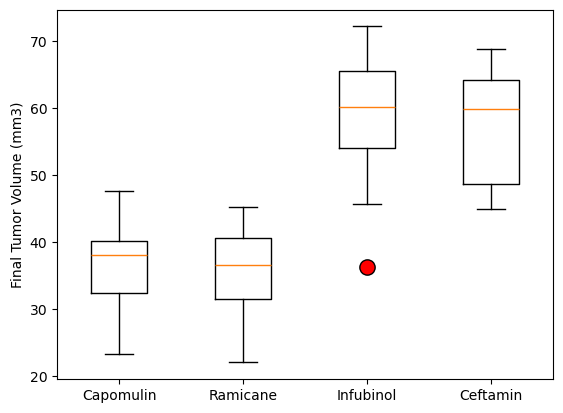

In [432]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
outlier_props = dict(marker='o', markerfacecolor='red', markersize=11, linestyle='none')
ax1.boxplot(tumor_vol_data, labels=treatment_list, flierprops=outlier_props)
plt.show()


## Line and Scatter Plots

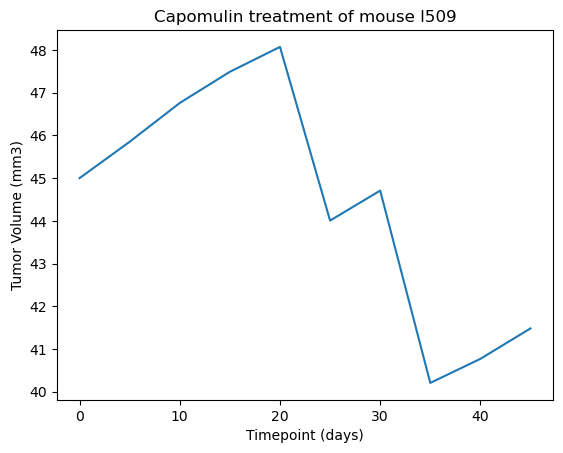

In [433]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_l509_data = cleaned_df[(cleaned_df['Mouse ID'] == 'l509') & (cleaned_df['Drug Regimen'] == 'Capomulin')]
x_axis = mouse_l509_data['Timepoint']
y_axis = mouse_l509_data['Tumor Volume (mm3)']

plt.plot(x_axis, y_axis)
plt.title('Capomulin treatment of mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


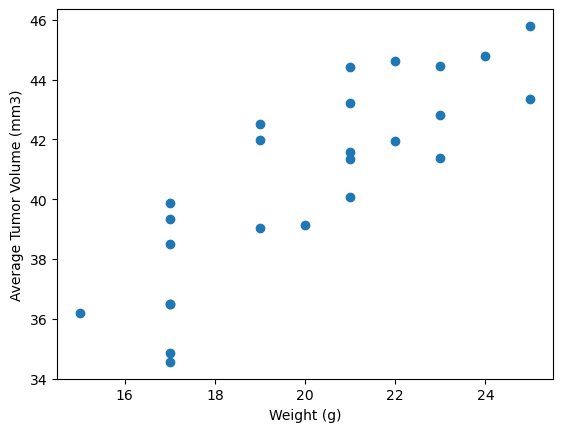

In [434]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = cleaned_df[cleaned_df['Drug Regimen'] == 'Capomulin']
average_tumor_volume_capomulin = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].first()

plt.scatter(weights, average_tumor_volume_capomulin)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


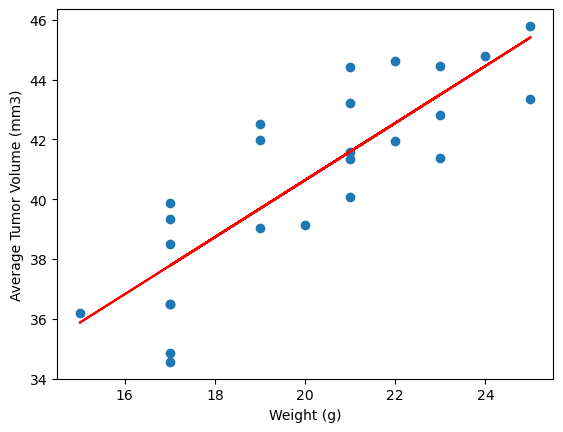

In [435]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation = st.pearsonr(weights,average_tumor_volume_capomulin)

(slope, intercept, rvalue, pvalue, stderr) = linregress(weights, average_tumor_volume_capomulin)
regress_values = weights * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(weights, average_tumor_volume_capomulin)
plt.plot(weights,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")
plt.show()
